# Car Selling Price Prediction

I create model to predict the car prices by car_details.csv dataset which containing 8128 car details that will be sold. It includes 15 features such as manufacturer, model name, year of manufacturer, and the price of cars will be sold. I create the model by 3 methods which are multiple linear regression, polynomial regression and Decision Tree, and I pick the best model.

## Modules Requirements

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

## Pre-process the data

In [2]:
cars=pd.read_csv('car_details.csv')
cars.head()

,manufacturer,name,year,km_driven,fuel,seller_type,transmission,owner,mileage (kmpl),engine (cc),max_power (bhp),torque,RPM,seats,selling_price
0,Maruti,Maruti Swift Dzire VDI,2014,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190.0,2000.0,5.0,450000
1,Skoda,Skoda Rapid 1.5 TDI Ambition,2014,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250.0,1500.0,5.0,370000
2,Honda,Honda City 2017-2020 EXi,2006,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,12.7,2700.0,5.0,158000
3,Hyundai,Hyundai i20 Sportz Diesel,2010,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,22.4,1750.0,5.0,225000
4,Maruti,Maruti Swift VXI BSIII,2007,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,11.5,4500.0,5.0,130000


In [3]:
cars.shape

(8128, 15)

In [4]:
cars.describe()

,year,km_driven,mileage (kmpl),engine (cc),max_power (bhp),torque,RPM,seats,selling_price
count,8128.000000,8.128000e+03,7907.000000,7907.000000,7912.000000,7906.000000,7691.000000,7907.000000,8.128000e+03
mean,2013.804011,6.981951e+04,19.418783,1458.625016,91.517923,168.250971,2706.525939,5.416719,6.382718e+05
std,4.044249,5.655055e+04,4.037145,503.916303,35.822501,97.295157,1135.961221,0.959588,8.062534e+05
min,1983.000000,1.000000e+00,0.000000,624.000000,0.000000,4.800000,175.000000,2.000000,2.999900e+04
25%,2011.000000,3.500000e+04,16.780000,1197.000000,68.050000,101.000000,1750.000000,5.000000,2.549990e+05
50%,2015.000000,6.000000e+04,19.300000,1248.000000,82.000000,154.900000,2000.000000,5.000000,4.500000e+05
75%,2017.000000,9.800000e+04,22.320000,1582.000000,102.000000,202.000000,4000.000000,5.000000,6.750000e+05
max,2020.000000,2.360457e+06,42.000000,3604.000000,400.000000,789.000000,21800.000000,14.000000,1.000000e+07


In [5]:
cars.isnull().sum()

manufacturer         0
name                 0
year                 0
km_driven            0
fuel                 0
seller_type          0
transmission         0
owner                0
mileage (kmpl)     221
engine (cc)        221
max_power (bhp)    216
torque             222
RPM                437
seats              221
selling_price        0
dtype: int64

### Handling missing values

In [6]:
# Handling missing values by change into median
median1 = cars['mileage (kmpl)'].median()
median2 = cars['engine (cc)'].median()
median3 = cars['max_power (bhp)'].median()
median4 = cars['torque'].median()
median5 = cars['RPM'].median()
median6 = cars['seats'].median()

cars['mileage (kmpl)'].fillna(median1, inplace=True)
cars['engine (cc)'].fillna(median2, inplace=True)
cars['max_power (bhp)'].fillna(median3, inplace=True)
cars['torque'].fillna(median4, inplace=True)
cars['RPM'].fillna(median5, inplace=True)
cars['seats'].fillna(median6, inplace=True)

In [7]:
cars.isnull().sum()

manufacturer       0
name               0
year               0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage (kmpl)     0
engine (cc)        0
max_power (bhp)    0
torque             0
RPM                0
seats              0
selling_price      0
dtype: int64

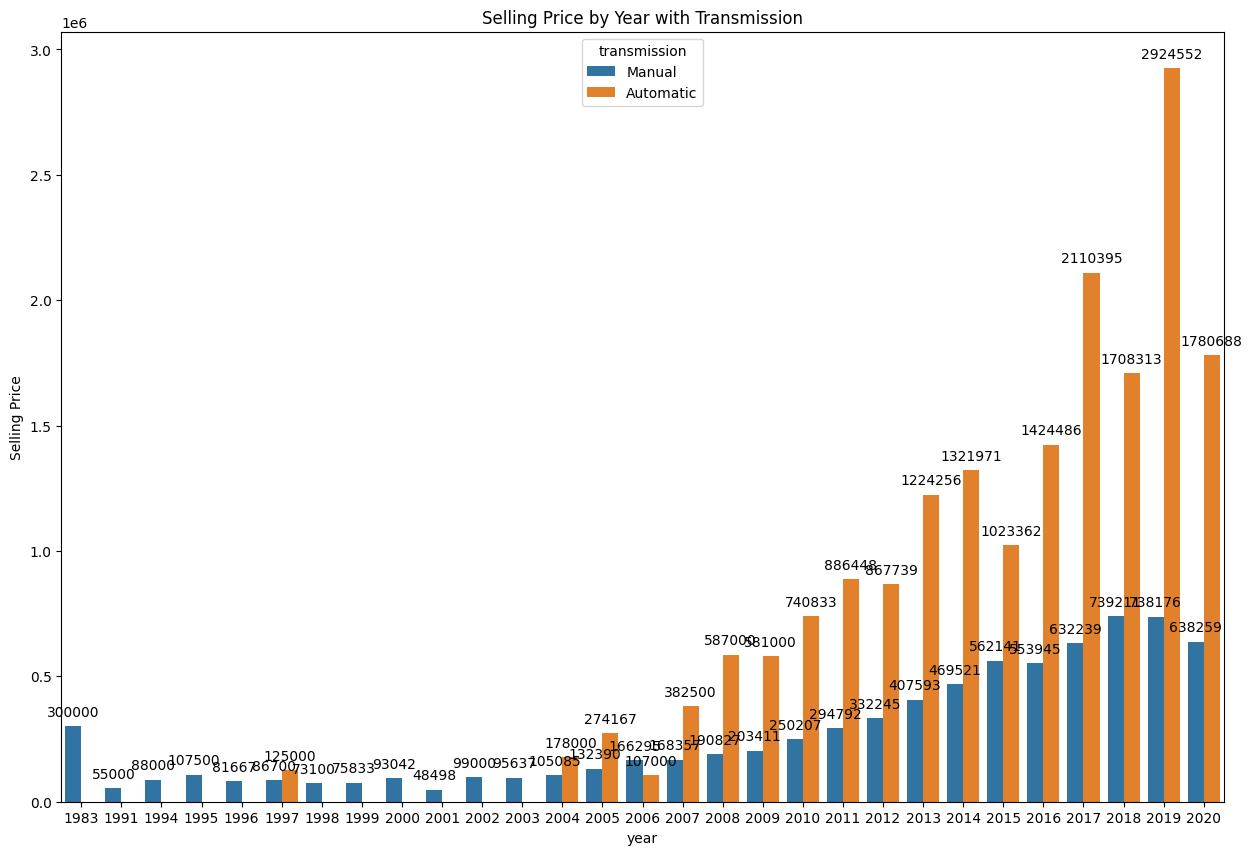

In [8]:
fig = plt.figure(figsize=(15, 10))
ax1 = fig.add_subplot(1, 1, 1)
data = sns.barplot(x="year", y="selling_price", hue="transmission", ci=None, data=cars, ax=ax1)
ax1.set_ylabel("Selling Price")
ax1.set_title("Selling Price by Year with Transmission")
for i in data.patches:
    data.annotate(format(i.get_height(), '.0f'), 
                  (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', 
                  xytext = (0, 10), textcoords = 'offset points')

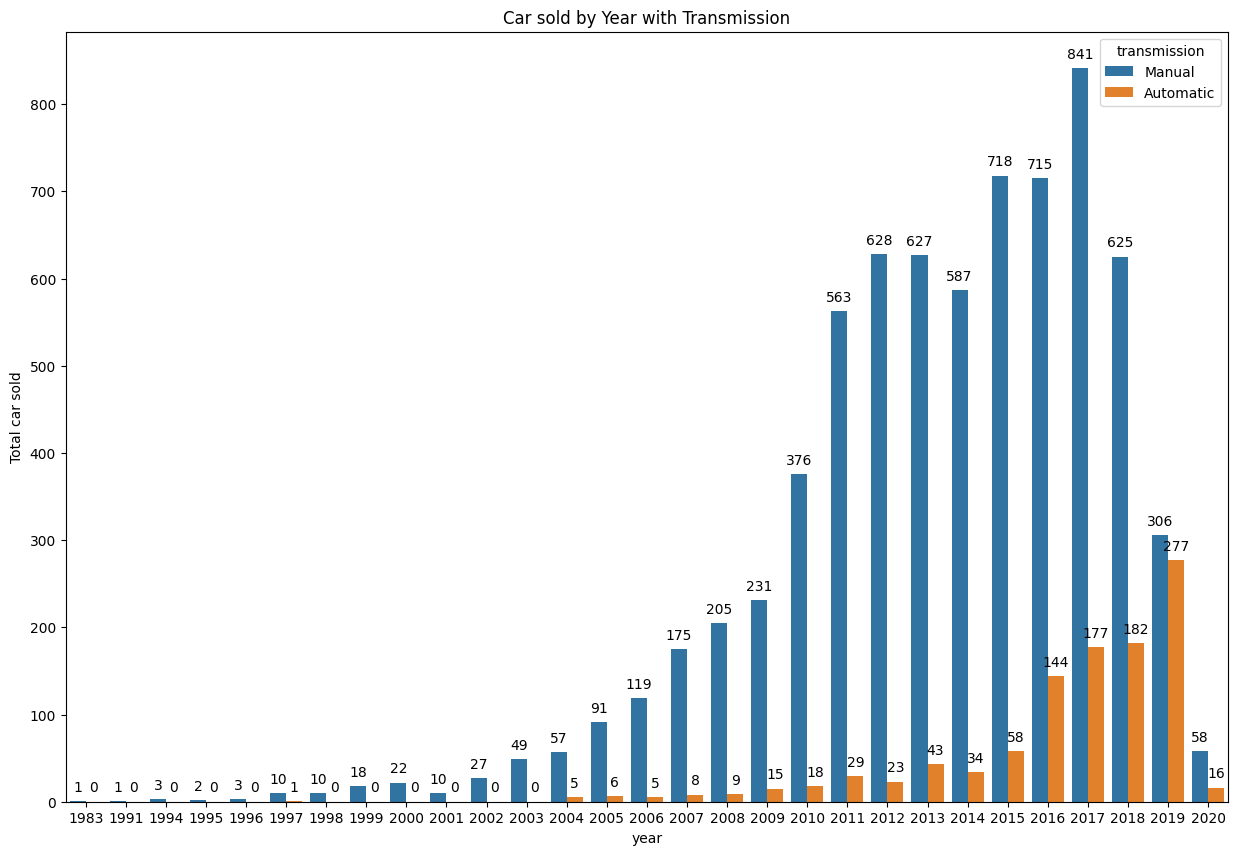

In [9]:
fig = plt.figure(figsize=(15, 10))
ax1 = fig.add_subplot(1, 1, 1)
data = sns.countplot(x="year", hue="transmission", data=cars, ax=ax1)
ax1.set_ylabel("Total car sold")
ax1.set_title("Car sold by Year with Transmission")
for i in data.patches:
    data.annotate(format(i.get_height(), '.0f'), 
                  (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', 
                  xytext = (0, 10), textcoords = 'offset points')

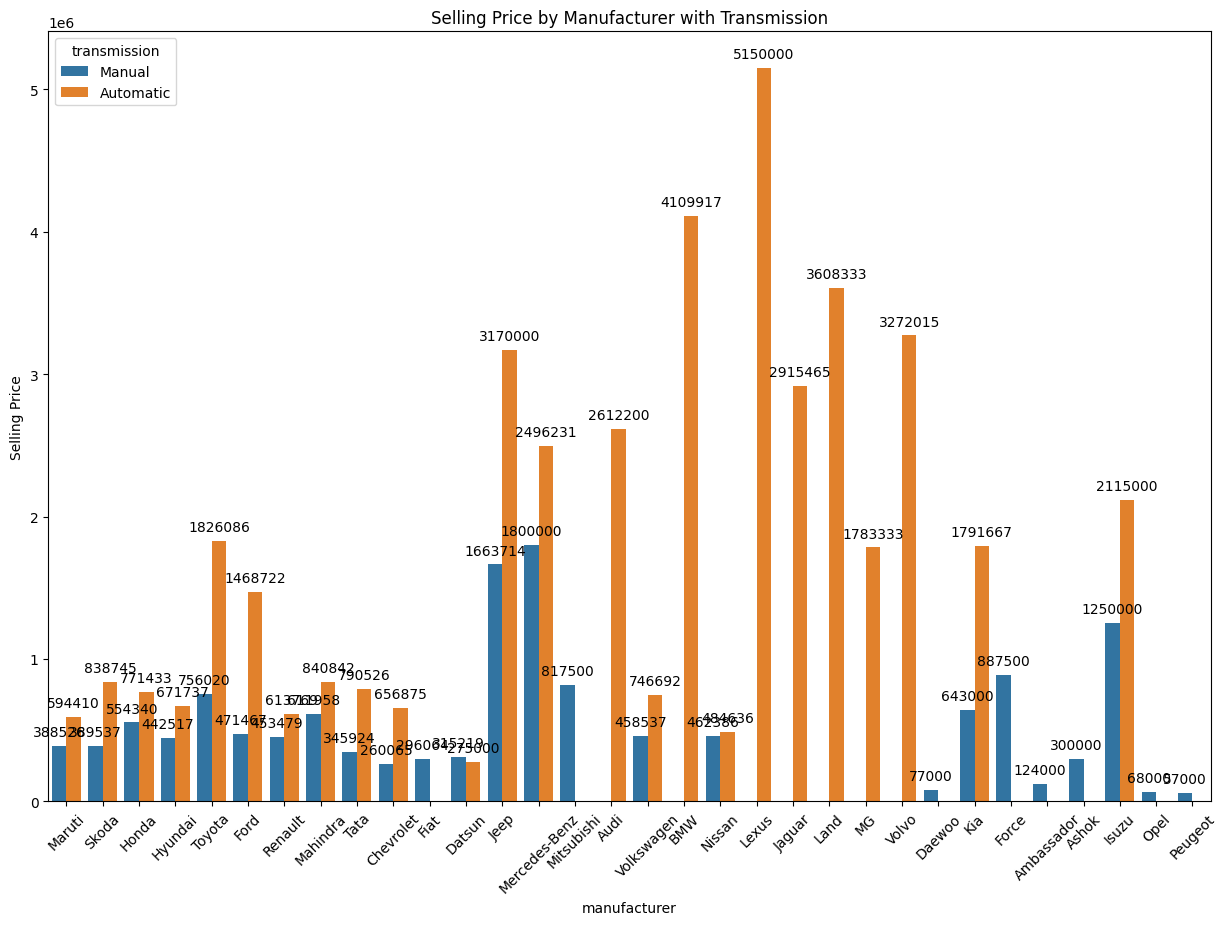

In [10]:
fig = plt.figure(figsize=(15, 10))
ax1 = fig.add_subplot(1, 1, 1)
data = sns.barplot(x="manufacturer", y="selling_price", ci=None, hue="transmission", data=cars, ax=ax1)
ax1.set_ylabel("Selling Price")
ax1.set_title("Selling Price by Manufacturer with Transmission")
for item in data.get_xticklabels():
    item.set_rotation(45)
for i in data.patches:
    data.annotate(format(i.get_height(), '.0f'), 
                  (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', 
                  xytext = (0, 10), textcoords = 'offset points')

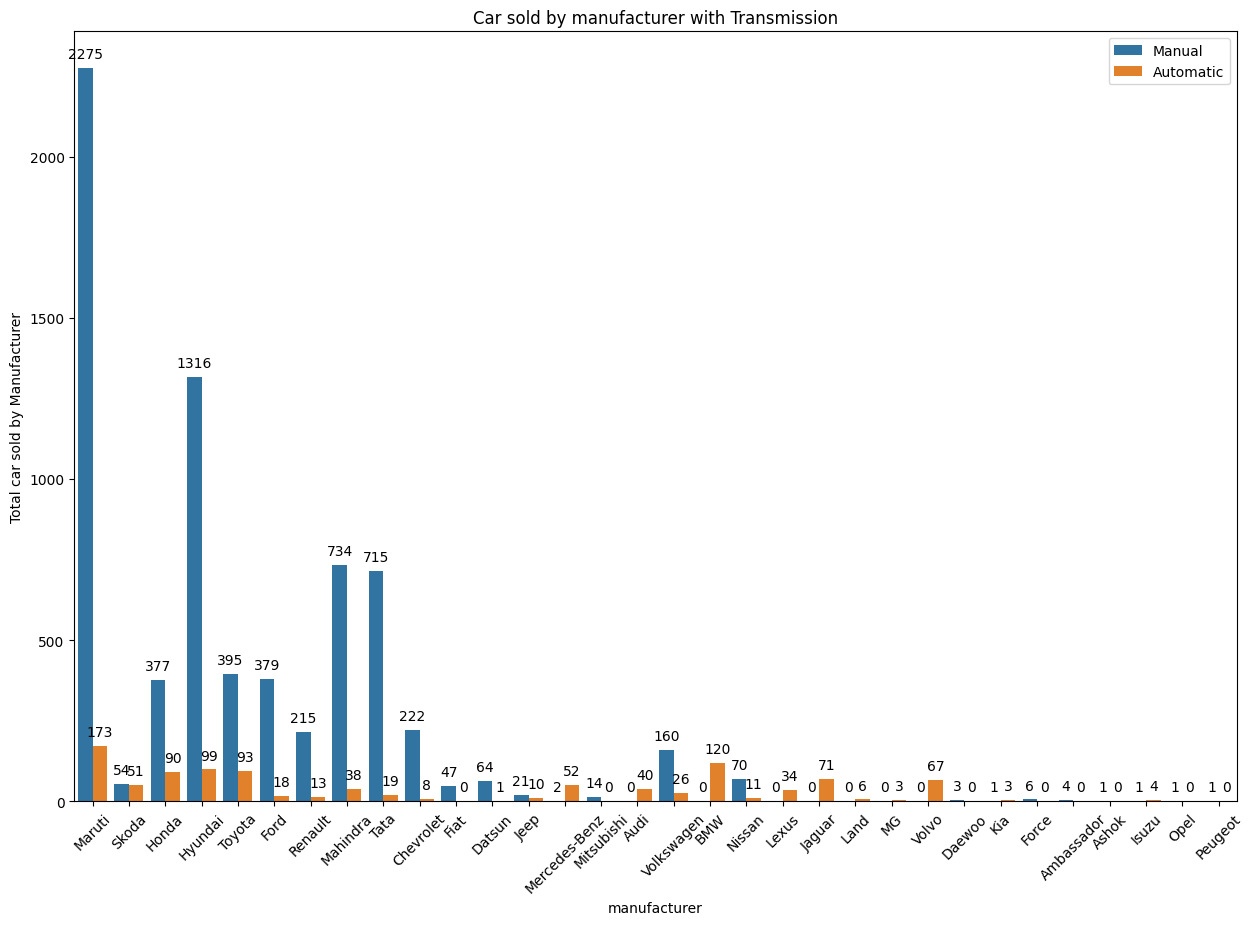

In [11]:
fig = plt.figure(figsize=(15, 10))
ax1 = fig.add_subplot(1, 1, 1)
data = sns.countplot(x="manufacturer", hue="transmission", data=cars, ax=ax1)
ax1.set_ylabel("Total car sold by Manufacturer")
ax1.set_title("Car sold by manufacturer with Transmission")
plt.legend(loc='upper right')
for item in data.get_xticklabels():
    item.set_rotation(45)
for i in data.patches:
    data.annotate(format(i.get_height(), '.0f'), 
                  (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', 
                  xytext = (0, 10), textcoords = 'offset points')

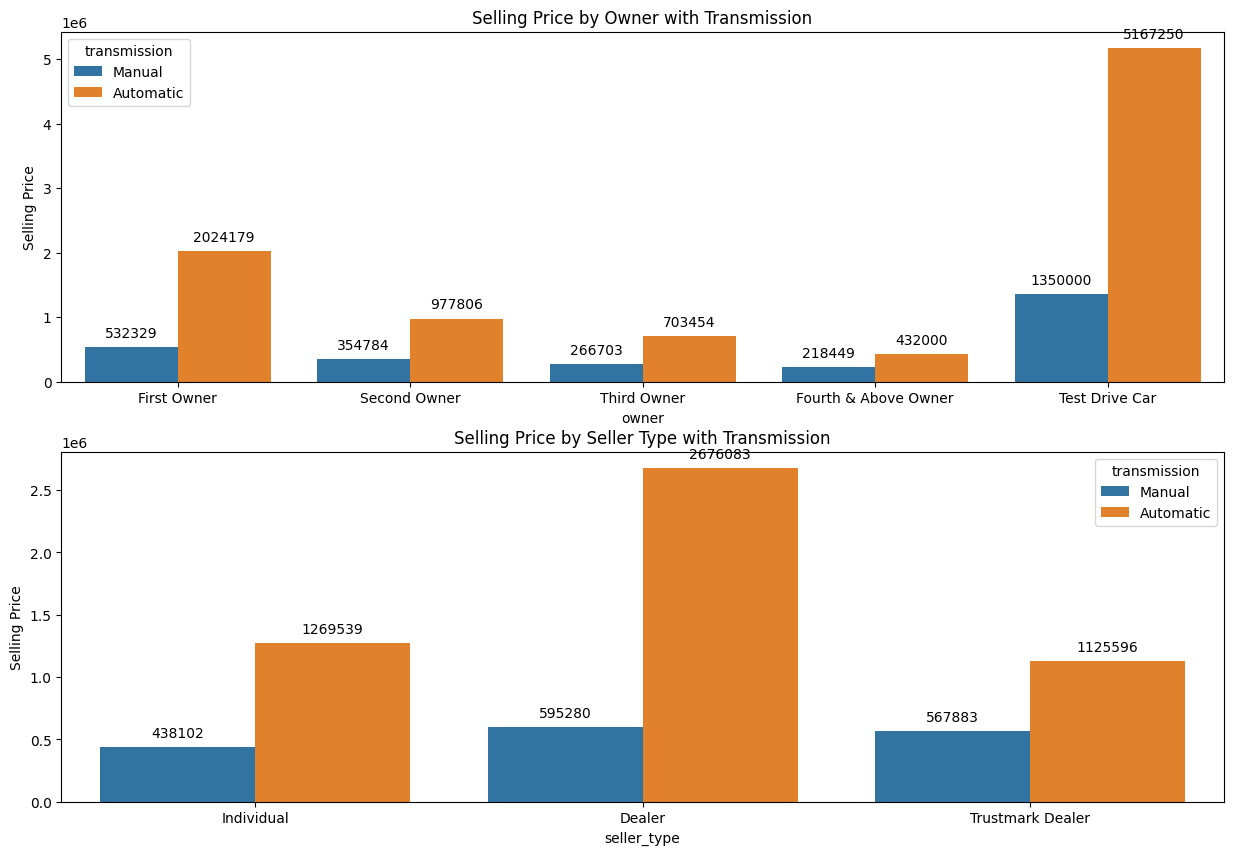

In [12]:
fig = plt.figure(figsize=(15, 10))
ax1 = fig.add_subplot(2, 1, 1)
data = sns.barplot(x="owner", y="selling_price", hue="transmission", ci=None, data=cars, ax=ax1)
ax1.set_ylabel("Selling Price")
ax1.set_title("Selling Price by Owner with Transmission")
for i in data.patches:
    data.annotate(format(i.get_height(), '.0f'), 
                  (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', 
                  xytext = (0, 10), textcoords = 'offset points')
    
ax2 = fig.add_subplot(2, 1, 2)
data = sns.barplot(x="seller_type", y="selling_price", hue="transmission", ci=None, data=cars, ax=ax2)
ax2.set_ylabel("Selling Price")
ax2.set_title("Selling Price by Seller Type with Transmission")
for i in data.patches:
    data.annotate(format(i.get_height(), '.0f'), 
                  (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', 
                  xytext = (0, 10), textcoords = 'offset points')

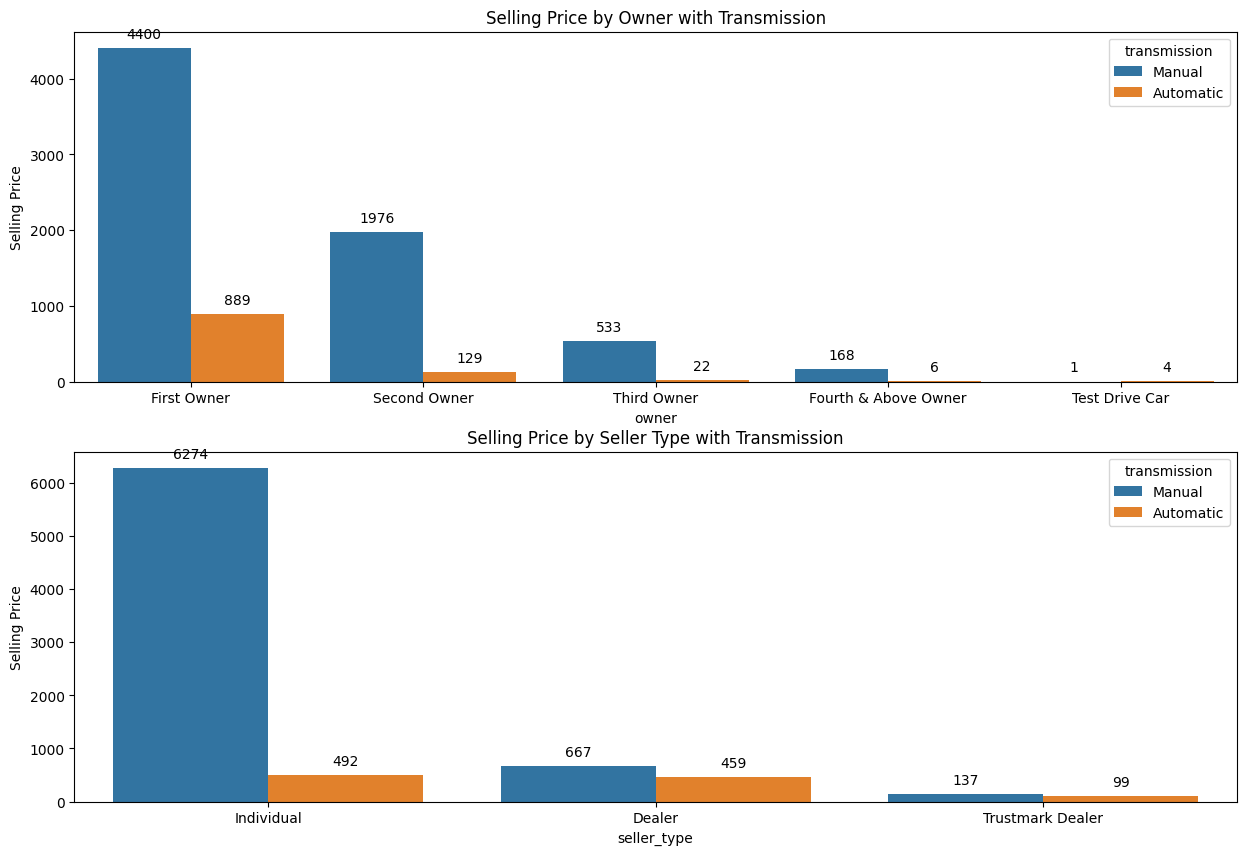

In [13]:
fig = plt.figure(figsize=(15, 10))
ax1 = fig.add_subplot(2, 1, 1)
data = sns.countplot(x="owner", hue="transmission", data=cars, ax=ax1)
ax1.set_ylabel("Selling Price")
ax1.set_title("Selling Price by Owner with Transmission")
for i in data.patches:
    data.annotate(format(i.get_height(), '.0f'), 
                  (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', 
                  xytext = (0, 10), textcoords = 'offset points')   

ax2 = fig.add_subplot(2, 1, 2)
data = sns.countplot(x="seller_type", hue="transmission", data=cars, ax=ax2)
ax2.set_ylabel("Selling Price")
ax2.set_title("Selling Price by Seller Type with Transmission")
for i in data.patches:
    data.annotate(format(i.get_height(), '.0f'), 
                  (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', 
                  xytext = (0, 10), textcoords = 'offset points')

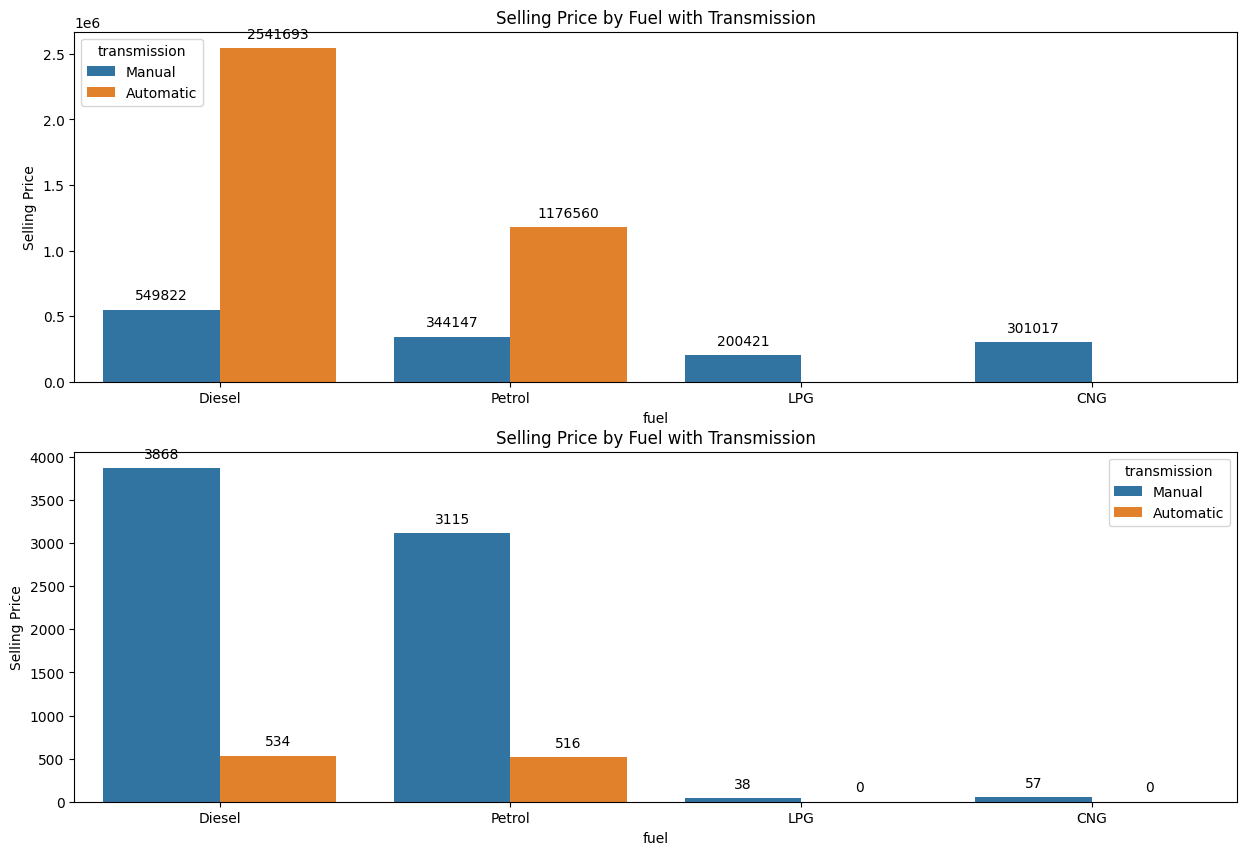

In [14]:
fig = plt.figure(figsize=(15, 10))
ax1 = fig.add_subplot(2, 1, 1)
data = sns.barplot(x="fuel", y="selling_price", hue="transmission", ci=None, data=cars, ax=ax1)
ax1.set_ylabel("Selling Price")
ax1.set_title("Selling Price by Fuel with Transmission")
for i in data.patches:
    data.annotate(format(i.get_height(), '.0f'), 
                  (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', 
                  xytext = (0, 10), textcoords = 'offset points')

ax2 = fig.add_subplot(2, 1, 2)
data = sns.countplot(x="fuel", hue="transmission", data=cars, ax=ax2)
ax2.set_ylabel("Selling Price")
ax2.set_title("Selling Price by Fuel with Transmission")
for i in data.patches:
    data.annotate(format(i.get_height(), '.0f'), 
                  (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', 
                  xytext = (0, 10), textcoords = 'offset points')

### Handling categorical features

In [15]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   manufacturer     8128 non-null   object 
 1   name             8128 non-null   object 
 2   year             8128 non-null   int64  
 3   km_driven        8128 non-null   int64  
 4   fuel             8128 non-null   object 
 5   seller_type      8128 non-null   object 
 6   transmission     8128 non-null   object 
 7   owner            8128 non-null   object 
 8   mileage (kmpl)   8128 non-null   float64
 9   engine (cc)      8128 non-null   float64
 10  max_power (bhp)  8128 non-null   float64
 11  torque           8128 non-null   float64
 12  RPM              8128 non-null   float64
 13  seats            8128 non-null   float64
 14  selling_price    8128 non-null   int64  
dtypes: float64(6), int64(3), object(6)
memory usage: 952.6+ KB


In [16]:
cars=cars.drop('name', axis=1)

In [17]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()

manu_encoded = encoder.fit_transform(cars[["manufacturer"]])
fuel_encoded = encoder.fit_transform(cars[["fuel"]])
seller_encoded = encoder.fit_transform(cars[["seller_type"]])
trans_encoded = encoder.fit_transform(cars[["transmission"]])
owner_encoded = encoder.fit_transform(cars[["owner"]])

In [18]:
# Replace the features with encoded features
cars['manufacturer']=manu_encoded
cars['fuel']=fuel_encoded
cars['seller_type']=seller_encoded
cars['transmission']=trans_encoded
cars['owner']=owner_encoded

In [19]:
cars.head()

,manufacturer,year,km_driven,fuel,seller_type,transmission,owner,mileage (kmpl),engine (cc),max_power (bhp),torque,RPM,seats,selling_price
0,20.0,2014,145500,1.0,1.0,1.0,0.0,23.40,1248.0,74.00,190.0,2000.0,5.0,450000
1,27.0,2014,120000,1.0,1.0,1.0,2.0,21.14,1498.0,103.52,250.0,1500.0,5.0,370000
2,10.0,2006,140000,3.0,1.0,1.0,4.0,17.70,1497.0,78.00,12.7,2700.0,5.0,158000
3,11.0,2010,127000,1.0,1.0,1.0,0.0,23.00,1396.0,90.00,22.4,1750.0,5.0,225000
4,20.0,2007,120000,3.0,1.0,1.0,0.0,16.10,1298.0,88.20,11.5,4500.0,5.0,130000


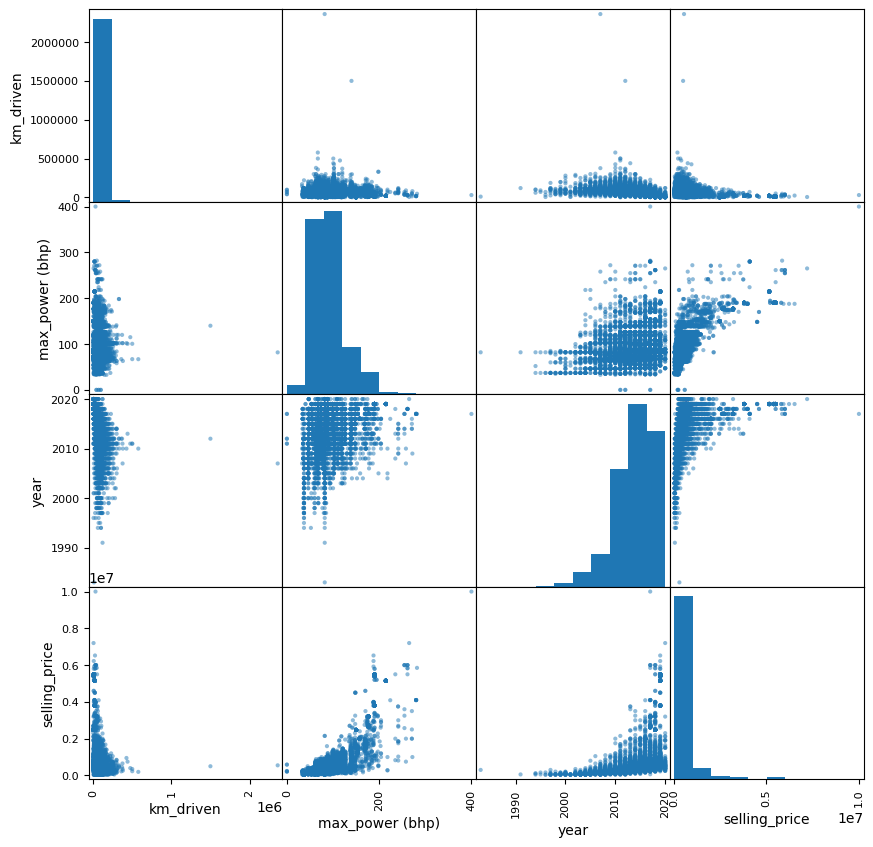

In [20]:
column=['km_driven','max_power (bhp)','year','selling_price']
scatter_matrix = pd.plotting.scatter_matrix(cars[column], figsize=(10,10))
plt.show()

In [21]:
corr_matrix=cars.corr()
corr_matrix['selling_price'].sort_values(ascending=False)

selling_price      1.000000
max_power (bhp)    0.747935
torque             0.618488
engine (cc)        0.458345
year               0.414092
seats              0.047135
manufacturer      -0.090271
mileage (kmpl)    -0.125040
RPM               -0.187833
fuel              -0.194029
km_driven         -0.225534
owner             -0.229174
seller_type       -0.335857
transmission      -0.588845
Name: selling_price, dtype: float64

In [22]:
data = cars.drop('selling_price', axis=1)
labels = cars['selling_price'].copy()
labels = labels.values.reshape(-1,1)

## Split dataset into training and testing set

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=0)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(6502, 13)
(6502, 1)
(1626, 13)
(1626, 1)


### Scaling dataset

In [24]:
from sklearn.preprocessing import StandardScaler

XScalerFit = StandardScaler().fit(x_train)
YScalerFit = StandardScaler().fit(y_train)

x_train_scaled = XScalerFit.transform(x_train)
y_train_scaled = YScalerFit.transform(y_train)

In [25]:
XScalerFit = StandardScaler().fit(x_test)
YScalerFit = StandardScaler().fit(y_test)

x_test_scaled = XScalerFit.transform(x_test)
y_test_scaled = YScalerFit.transform(y_test)

## 1. Multiple Linear Regression

In [26]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train_scaled, y_train_scaled)

LinearRegression()

In [29]:
from sklearn import metrics
test_pred = model.predict(x_test_scaled)

test_mse = metrics.mean_squared_error(y_test_scaled, test_pred)
test_rmse = np.sqrt(test_mse)
test_mae = metrics.mean_absolute_error(y_test_scaled, test_pred)
test_r2 = metrics.r2_score(y_test_scaled, test_pred)

print("Test MSE :%.2f" % test_mse)
print("Test RMSE :%.2f" % test_rmse)
print("Test MAE :%.2f" % test_mae)
print("Test R2 :%.2f" % test_r2)

Test MSE :0.32
Test RMSE :0.56
Test MAE :0.34
Test R2 :0.68


In [31]:
transform_pred_test = YScalerFit.inverse_transform(test_pred.reshape(-1, 1))

test_data = pd.DataFrame(x_test)
test_data['test_prediction'] = transform_pred_test
test_data['selling_price'] = y_test
test_data['residual'] = test_data['selling_price']-test_data['test_prediction']

test_data.head()

,manufacturer,year,km_driven,fuel,seller_type,transmission,owner,mileage (kmpl),engine (cc),max_power (bhp),torque,RPM,seats,test_prediction,selling_price,residual
3558,11.0,2013,40000,1.0,1.0,1.0,0.0,21.90,1396.0,88.80,219.7,1500.0,5.0,6.534694e+05,345000,-3.084694e+05
233,19.0,2013,70000,1.0,1.0,1.0,0.0,12.83,2696.0,162.00,340.0,1800.0,7.0,1.364042e+06,900000,-4.640422e+05
7952,20.0,2019,5000,3.0,1.0,0.0,0.0,21.70,998.0,67.00,90.0,3500.0,5.0,1.019235e+06,475000,-5.442352e+05
572,20.0,2004,120000,3.0,1.0,1.0,4.0,18.90,998.0,67.10,90.0,3500.0,5.0,-2.516332e+05,120000,3.716332e+05
6960,17.0,2019,20000,3.0,0.0,0.0,0.0,22.37,2487.0,214.56,202.0,3600.0,5.0,3.075389e+06,5150000,2.074611e+06


## 2. Polynomial Regression

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=1)
data_poly = poly.fit_transform(x_train_scaled)
model_poly = LinearRegression()

model_poly.fit(data_poly, y_train_scaled)

LinearRegression()

In [34]:
data_test_poly = poly.fit_transform(x_test_scaled)
poly_test_pred = model_poly.predict(data_test_poly)

poly_test_mse = metrics.mean_squared_error(y_test_scaled, poly_test_pred)
poly_test_mae = metrics.mean_absolute_error(y_test_scaled, poly_test_pred)
poly_test_r2 = metrics.r2_score(y_test_scaled, poly_test_pred)

print('Poly Test MSE:', poly_test_mse)
print('Poly Test RMSE:', np.sqrt(poly_test_mse))
print('Poly MAE:', poly_test_mae)
print('Poly R-Squared:', poly_test_r2)

Poly Test MSE: 0.3191958920537685
Poly Test RMSE: 0.5649742401683182
Poly MAE: 0.3367520325254654
Poly R-Squared: 0.6808041079462315


In [35]:
poly_transform_pred_test = YScalerFit.inverse_transform(poly_test_pred.reshape(-1, 1))

poly_test_data = pd.DataFrame(x_test)
poly_test_data['poly_test_prediction'] = poly_transform_pred_test
poly_test_data['selling_price'] = y_test
poly_test_data['poly_residual'] = poly_test_data['selling_price']-poly_test_data['poly_test_prediction']

poly_test_data.head()

,manufacturer,year,km_driven,fuel,seller_type,transmission,owner,mileage (kmpl),engine (cc),max_power (bhp),torque,RPM,seats,test_prediction,selling_price,residual,poly_test_prediction,poly_residual
3558,11.0,2013,40000,1.0,1.0,1.0,0.0,21.90,1396.0,88.80,219.7,1500.0,5.0,6.534694e+05,345000,-3.084694e+05,6.534694e+05,-3.084694e+05
233,19.0,2013,70000,1.0,1.0,1.0,0.0,12.83,2696.0,162.00,340.0,1800.0,7.0,1.364042e+06,900000,-4.640422e+05,1.364042e+06,-4.640422e+05
7952,20.0,2019,5000,3.0,1.0,0.0,0.0,21.70,998.0,67.00,90.0,3500.0,5.0,1.019235e+06,475000,-5.442352e+05,1.019235e+06,-5.442352e+05
572,20.0,2004,120000,3.0,1.0,1.0,4.0,18.90,998.0,67.10,90.0,3500.0,5.0,-2.516332e+05,120000,3.716332e+05,-2.516332e+05,3.716332e+05
6960,17.0,2019,20000,3.0,0.0,0.0,0.0,22.37,2487.0,214.56,202.0,3600.0,5.0,3.075389e+06,5150000,2.074611e+06,3.075389e+06,2.074611e+06


## 3. Decision Tree

In [36]:
from sklearn.tree import DecisionTreeRegressor

model_dt = DecisionTreeRegressor()
model_dt.fit(x_train_scaled, y_train_scaled)

DecisionTreeRegressor()

In [37]:
dt_test_pred = model_dt.predict(x_test_scaled)

dt_test_mse = metrics.mean_squared_error(y_test_scaled, dt_test_pred)
dt_test_mae = metrics.mean_absolute_error(y_test_scaled, dt_test_pred)
dt_test_r2 = metrics.r2_score(y_test_scaled, dt_test_pred)

print('DT Test MSE:', dt_test_mse)
print('DT Test RMSE:', np.sqrt(dt_test_mse))
print('DT Test MAE:', dt_test_mae)
print('DT Test R-Squared:', dt_test_r2)

DT Test MSE: 0.12509444396319935
DT Test RMSE: 0.35368692930782636
DT Test MAE: 0.1517432339958644
DT Test R-Squared: 0.8749055560368006


In [38]:
dt_transform_pred_test = YScalerFit.inverse_transform(dt_test_pred.reshape(-1, 1))

dt_test_data = pd.DataFrame(x_test)
dt_test_data['dt_test_prediction'] = dt_transform_pred_test
dt_test_data['selling_price'] = y_test
dt_test_data['dt_residual'] = dt_test_data['selling_price']-dt_test_data['dt_test_prediction']

dt_test_data.head()

,manufacturer,year,km_driven,fuel,seller_type,transmission,owner,mileage (kmpl),engine (cc),max_power (bhp),torque,RPM,seats,test_prediction,selling_price,residual,poly_test_prediction,poly_residual,dt_test_prediction,dt_residual
3558,11.0,2013,40000,1.0,1.0,1.0,0.0,21.90,1396.0,88.80,219.7,1500.0,5.0,6.534694e+05,345000,-3.084694e+05,6.534694e+05,-3.084694e+05,4.493038e+05,-104303.777817
233,19.0,2013,70000,1.0,1.0,1.0,0.0,12.83,2696.0,162.00,340.0,1800.0,7.0,1.364042e+06,900000,-4.640422e+05,1.364042e+06,-4.640422e+05,1.502418e+06,-602417.959270
7952,20.0,2019,5000,3.0,1.0,0.0,0.0,21.70,998.0,67.00,90.0,3500.0,5.0,1.019235e+06,475000,-5.442352e+05,1.019235e+06,-5.442352e+05,4.975390e+05,-22538.973990
572,20.0,2004,120000,3.0,1.0,1.0,4.0,18.90,998.0,67.10,90.0,3500.0,5.0,-2.516332e+05,120000,3.716332e+05,-2.516332e+05,3.716332e+05,5.790442e+04,62095.582070
6960,17.0,2019,20000,3.0,0.0,0.0,0.0,22.37,2487.0,214.56,202.0,3600.0,5.0,3.075389e+06,5150000,2.074611e+06,3.075389e+06,2.074611e+06,5.170226e+06,-20226.255542


## Comparing Results

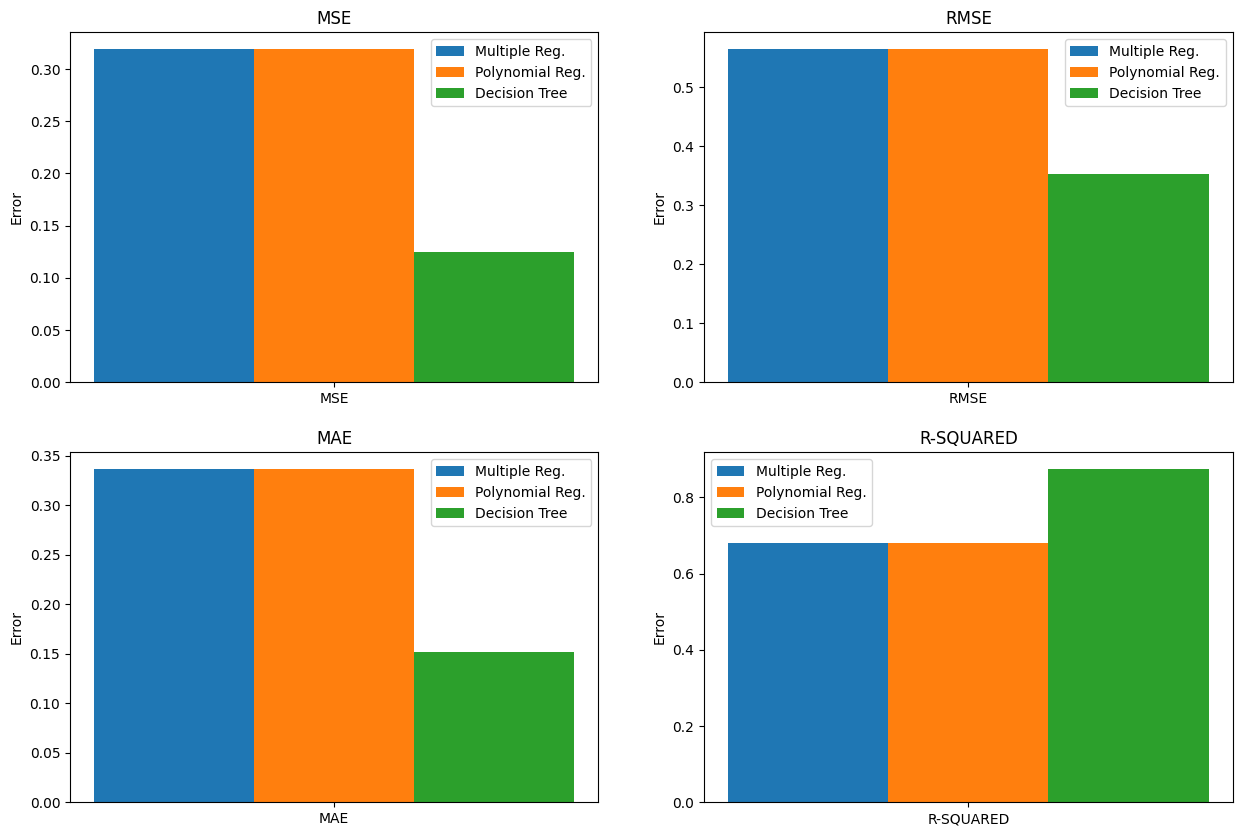

In [40]:
labels1 = ['MSE']

data1 = range(len(labels1))
width = 0.4

fig = plt.figure(figsize=[15, 10])
ax1 = fig.add_subplot(2, 2, 1)
ax1.bar(data1, test_mse, width, label='Multiple Reg.')
ax1.bar(width, poly_test_mse, width, label='Polynomial Reg.')
ax1.bar(2*width, dt_test_mse, width, label='Decision Tree')
ax1.set_ylabel('Error')
ax1.set_title('MSE')
ax1.set_xticks([i+2*width/2 for i in data1])
ax1.set_xticklabels(labels1)
ax1.legend()

labels2 = ['RMSE']
data2 = range(len(labels2))

ax2 = fig.add_subplot(2, 2, 2)
ax2.bar(data2, np.sqrt(test_mse), width, label='Multiple Reg.')
ax2.bar(width, np.sqrt(poly_test_mse), width, label='Polynomial Reg.')
ax2.bar(2*width, np.sqrt(dt_test_mse), width, label='Decision Tree')
ax2.set_ylabel('Error')
ax2.set_title('RMSE')
ax2.set_xticks([i+2*width/2 for i in data2])
ax2.set_xticklabels(labels2)
ax2.legend()

labels3 = ['MAE']
data3 = range(len(labels3))

ax3 = fig.add_subplot(2, 2, 3)
ax3.bar(data3, test_mae, width, label='Multiple Reg.')
ax3.bar(width, poly_test_mae, width, label='Polynomial Reg.')
ax3.bar(2*width, dt_test_mae, width, label='Decision Tree')
ax3.set_ylabel('Error')
ax3.set_title('MAE')
ax3.set_xticks([i+2*width/2 for i in data3])
ax3.set_xticklabels(labels3)
ax3.legend()

labels4 = ['R-SQUARED']
data4 = range(len(labels4))

ax4 = fig.add_subplot(2, 2, 4)
ax4.bar(data4, test_r2, width, label='Multiple Reg.')
ax4.bar(width, poly_test_r2, width, label='Polynomial Reg.')
ax4.bar(2*width, dt_test_r2, width, label='Decision Tree')
ax4.set_ylabel('Error')
ax4.set_title('R-SQUARED')
ax4.set_xticks([i+2*width/2 for i in data4])
ax4.set_xticklabels(labels4)
ax4.legend()

plt.show()

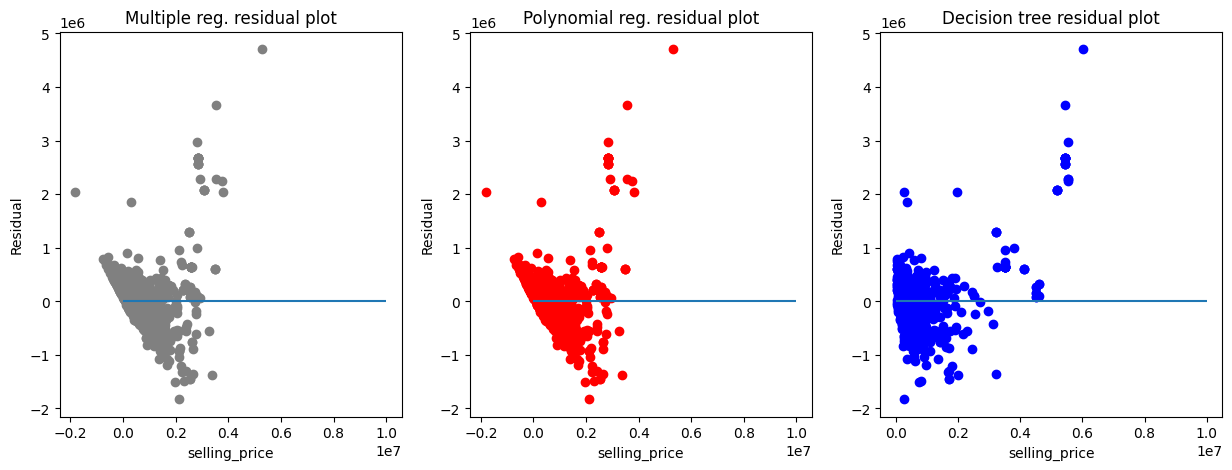

In [41]:
fig = plt.figure(figsize=[15, 5])
ax1 = fig.add_subplot(1, 3, 1)
ax1.scatter(test_data['test_prediction'], test_data['residual'], c='gray')
ax1.hlines(y=0, xmin=0, xmax=max(test_data['selling_price']))
ax1.set_title('Multiple reg. residual plot')
ax1.set_ylabel('Residual')
ax1.set_xlabel('selling_price')

ax2 = fig.add_subplot(1, 3, 2)
ax2.scatter(poly_test_data['poly_test_prediction'], poly_test_data['residual'], c='red')
ax2.hlines(y=0, xmin=0, xmax=max(poly_test_data['selling_price']))
ax2.set_title('Polynomial reg. residual plot')
ax2.set_ylabel('Residual')
ax2.set_xlabel('selling_price')

ax2 = fig.add_subplot(1, 3, 3)
ax2.scatter(dt_test_data['dt_test_prediction'], dt_test_data['residual'], c='blue')
ax2.hlines(y=0, xmin=0, xmax=max(dt_test_data['selling_price']))
ax2.set_title('Decision tree residual plot')
ax2.set_ylabel('Residual')
ax2.set_xlabel('selling_price')
plt.show()

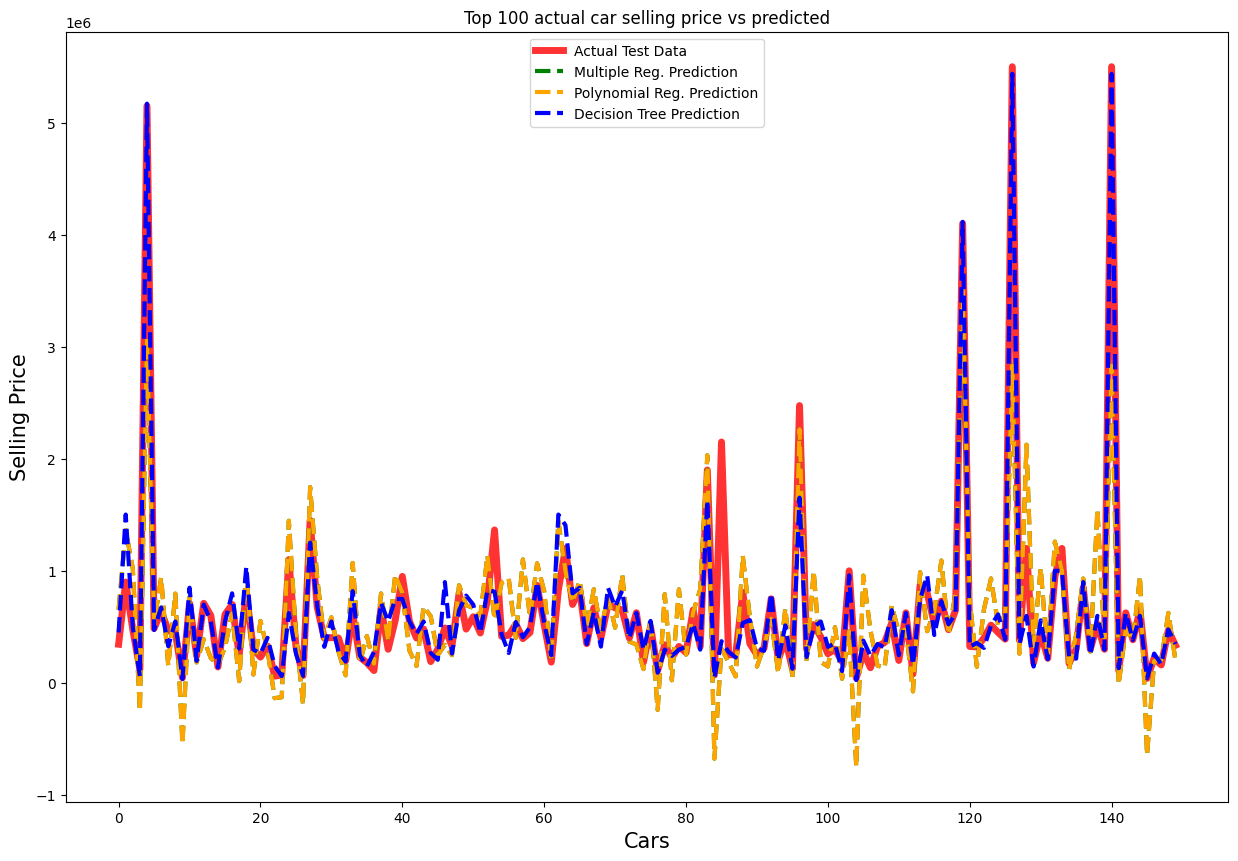

In [48]:
fig = plt.figure(figsize=(15, 10))

num = np.arange(0, 150)

ax = fig.add_subplot(1, 1, 1)
ax.plot(num, test_data['selling_price'][0:150], lw =5, alpha=0.8, ls = '-', label = 'Actual Test Data', c='red')
ax.plot(num, test_data['test_prediction'][0:150], lw =3, ls = '--', label = 'Multiple Reg. Prediction', c='green')
ax.plot(num, poly_test_data['poly_test_prediction'][0:150], lw =3, ls = '--', label = 'Polynomial Reg. Prediction', c='orange')
ax.plot(num, dt_test_data['dt_test_prediction'][0:150], lw =3, ls = '--', label = 'Decision Tree Prediction', c='blue')
ax.set_xlabel('Cars', fontsize=15)
ax.set_ylabel('Selling Price', fontsize=15)
ax.set_title('Top 100 actual car selling price vs predicted')
plt.legend()
plt.show()

> I can see that the Decision Tree is the best model to predict the selling price of the car compared to Regression due to low MSE, RMSE, MAE, and high R-squared.